Based on this lecture: https://www.youtube.com/watch?v=OOu5KP3Gvx0

In [104]:
import scipy
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

In [22]:
file = "tests/line.jpg" 
img = cv2.imread(file)

In [23]:
img2d = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [24]:
img.shape, img2d.shape

((828, 1353, 3), (828, 1353))

In [ ]:
imgFft = scipy.fft.fft2(img2d) # complex numbers
fft2_shifted = scipy.fft.fftshift(imgFft) # shift zero freq to center of the image
magnitude_spectrum = np.log(np.abs(fft2_shifted)) # get magnitude, log scale for visualization


In [41]:
imgFft.shape, fft2_shifted.shape,magnitude_spectrum.shape

((828, 1353), (828, 1353), (828, 1353))

Text(0.5, 1.0, 'Magnitude Spectrum')

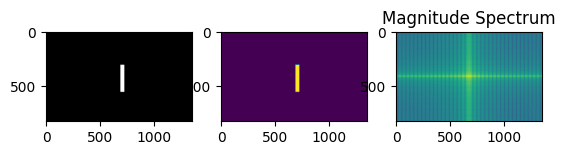

In [ ]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(img)
ax[1].imshow(img2d)
ax[2].imshow(magnitude_spectrum)
ax[2].set_title("Magnitude Spectrum")


In [43]:
rfft = scipy.fft.ifft2(imgFft)

In [44]:
rfft.shape

(828, 1353)

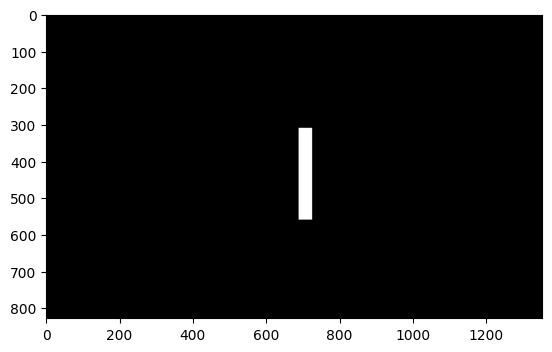

In [49]:
plt.imshow(rfft.real, cmap='gray')

In [83]:
# center frequency to remove
circle = np.zeros(img2d.shape, dtype=np.uint8)
circle.shape

(828, 1353)

In [84]:
img2d.shape

(828, 1353)

In [85]:
radius = 100
center = (np.array(img2d.shape)/2).astype(int) 
center # center of the image

array([414, 676])

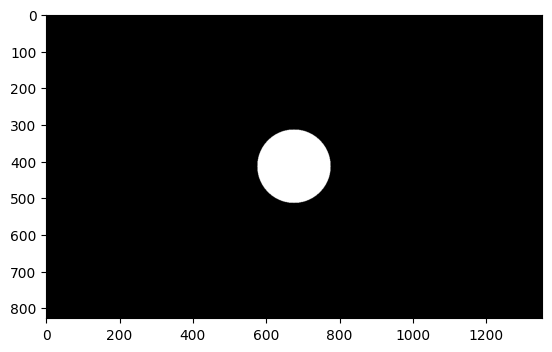

In [86]:
circleMask = cv2.circle(circle, center[::-1], radius, (255,255,255),-1)
plt.imshow(circleMask, cmap='gray')

In [91]:
maskedfft = fft2_shifted*circleMask

C:\Users\bdtho\AppData\Local\Temp\ipykernel_19976\1279772352.py:1: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_masked = np.log(np.abs(maskedfft))


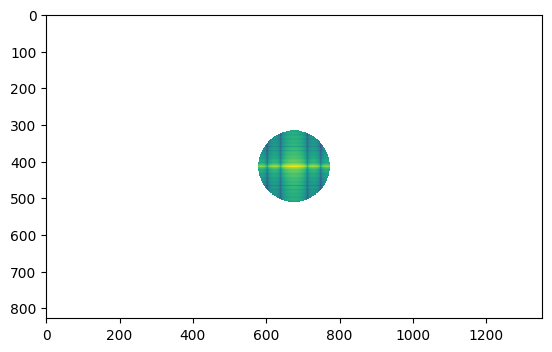

In [96]:
magnitude_spectrum_masked = np.log(np.abs(maskedfft))
plt.imshow(magnitude_spectrum_masked)

In [98]:
# reconstructing image just from this much data
rshift_maskedfft = np.fft.ifftshift(maskedfft) # take reverse shift
rfft_masked = np.fft.ifft2(rshift_maskedfft) # take ifft 
rfft_masked = np.abs(rfft_masked) # get only absolute values
rfft_masked.shape

(828, 1353)

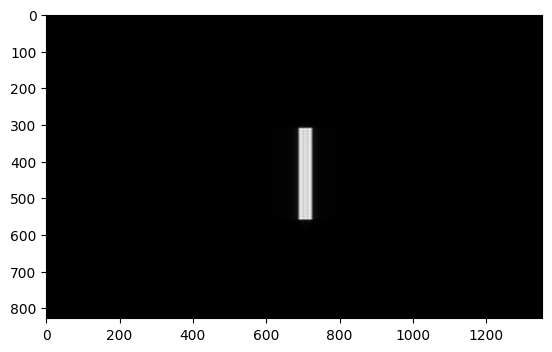

In [101]:
# get the final image after masking
plt.imshow(rfft_masked, cmap='gray')

## Phase


In [145]:
img2 = cv2.imread("tests/test_image.jpg",0) # get grayscale image
img2.shape

(512, 512)

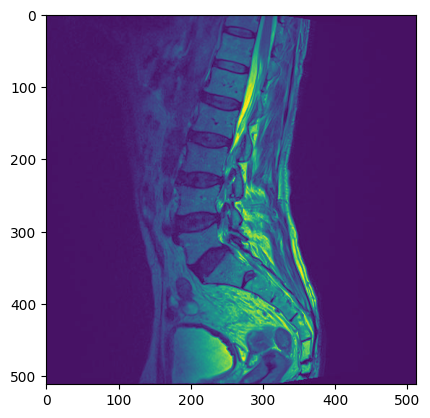

In [146]:
plt.imshow(img2)

In [147]:
fft_img2 = np.fft.fft2(img2)
fft_shifted_img2 = np.fft.fftshift(fft_img2)


In [162]:
# get magnitube and phase
magnitude_img2 = np.abs(fft_shifted_img2)
phase_img2 = np.angle(fft_shifted_img2)
magnitude_img2.shape, phase_img2.shape

((512, 512), (512, 512))

Text(0.5, 1.0, 'Only Magniude Data')

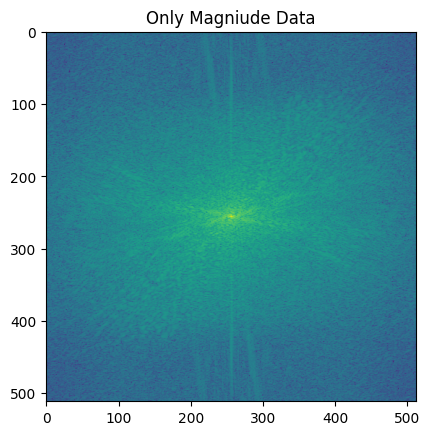

In [174]:
plt.imshow(np.log(np.abs(magnitude_img2)))
plt.title("Only Magniude Data")

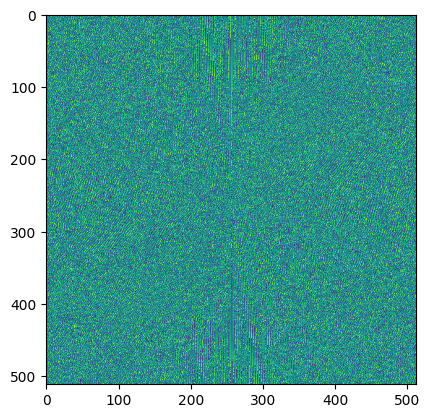

In [164]:
plt.imshow(phase_img2)

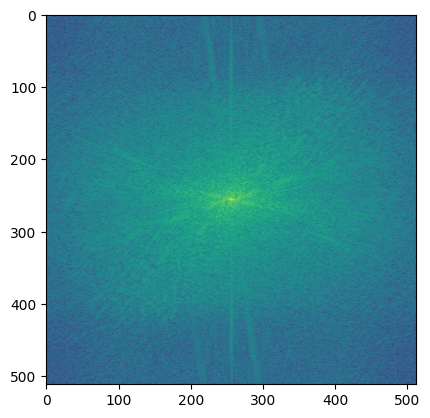

In [ ]:
# set phase to zero
# new_fft_img2 = magnitude_img2 * np.exp(1j*phase_img2) # to get the actual phase
new_fft_img2 = magnitude_img2 * np.exp(1j*0)  # to zero the phase
plt.imshow(np.log(np.abs(new_fft_img2)))


In [221]:
r_new_fft_img2 = np.fft.ifftshift(new_fft_img2) # get ifftshited 
r_new_img2 = np.fft.ifft2(r_new_fft_img2) # get ifft2
new_img2 = np.real(r_new_img2) # get real values only
new_img2 = cv2.normalize(new_img2, None, 0, 255, cv2.NORM_MINMAX) # normalize 


Text(0.5, 1.0, 'After the phase is zeroed')

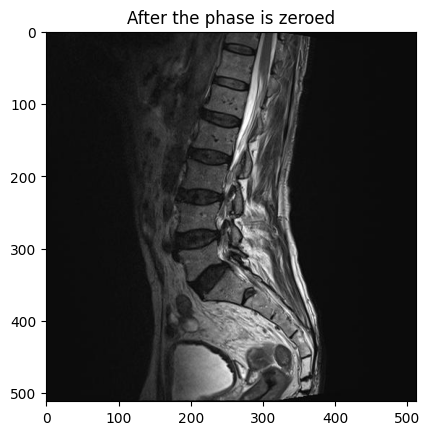

In [222]:
plt.imshow(new_img2, cmap='gray')
plt.title("After the phase is zeroed")

#### Only Phase kept, magnitude constant

In [194]:
# we will get the magnitude from the random image (test_image2) and join the phases of the first image and built it back

img3 = cv2.imread("tests/test_image.jpg",0)
img4 = cv2.imread("tests/test_image_2.jpg",0)

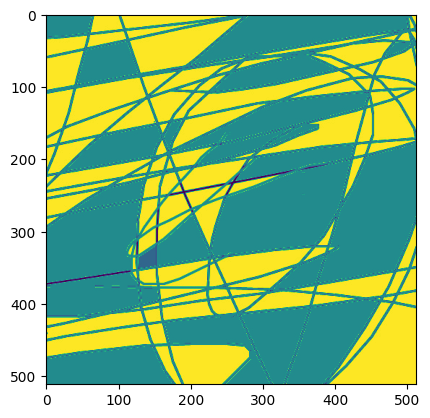

In [197]:
plt.imshow(img4)

In [195]:
img3.shape, img4.shape

((512, 512), (512, 512))

In [ ]:
# get fft of both images
fft_img3 = np.fft.fft2(img3)
fft_img4 = np.fft.fft2(img4)

In [208]:
# get fft_shifted
fft_shift_img3 = np.fft.fftshift(fft_img3)
fft_shift_img4 = np.fft.fftshift(fft_img4)
fft_shift_img3.shape, fft_shift_img4.shape

((512, 512), (512, 512))

In [200]:
# get phase and magnitude of each
mag_img3, phase_img3 = np.abs(fft_shift_img3), np.angle(fft_shift_img3)
mag_img4, phase_img4 = np.abs(fft_shift_img4), np.angle(fft_shift_img4)

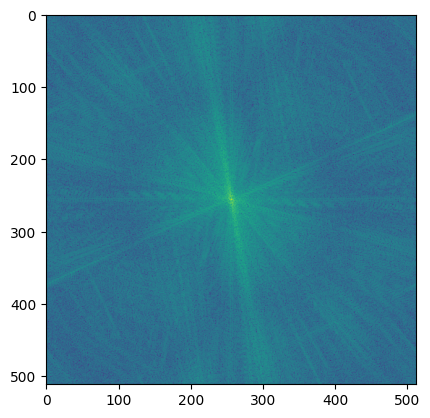

In [213]:
plt.imshow(np.log(np.abs(mag_img4)))

In [223]:
# now we will make and image with magnitube of image 4 and phase of image 3 and rebuild them
combined_new = mag_img4 * np.exp(1j * phase_img3)

In [226]:
# rebuild this new combined image
ifft_shifted_combined = np.fft.ifftshift(combined_new) # shift ifft
ifft_combined = np.fft.ifft2(ifft_shifted_combined)

r_combined_new = np.real(ifft_combined) # get real
r_combined_new = cv2.normalize(r_combined_new, None, 0, 255, cv2.NORM_MINMAX)


Text(0.5, 1.0, 'Magnitude of Random image, phase of original image')

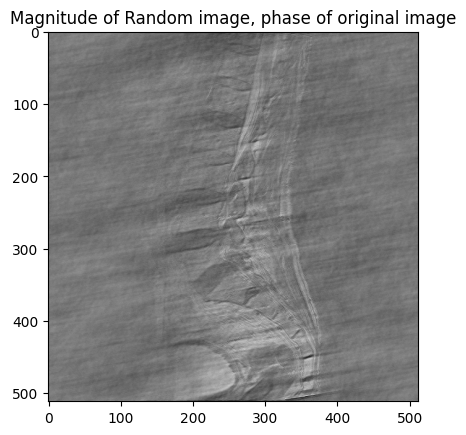

In [227]:
plt.imshow(r_combined_new, cmap='gray')
plt.title("Magnitude of Random image, phase of original image")

## Hybrid Images

In [293]:
tesla = cv2.imread("tests/tesla.jpg", 0)
einstein = cv2.imread("tests/einstein.jpg", 0)
tesla.shape, einstein.shape

((512, 512), (512, 512))

In [294]:
# get fft
fft_tesla = np.fft.fft2(tesla)
fft_einstein = np.fft.fft2(einstein)

In [295]:
# get fftshift
fft_shift_tesla = np.fft.fftshift(fft_tesla)
fft_shift_eisntein = np.fft.fftshift(fft_einstein)

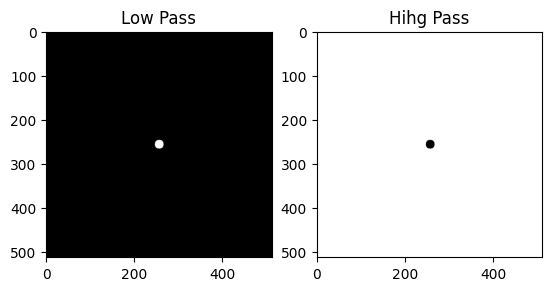

In [296]:
# get filter
radius = 10
circle = np.zeros(tesla.shape, dtype=np.uint8) # both shapes are same
center = (np.array(tesla.shape)/2).astype(int) # ([256, 256])
circleMask_lowpass = cv2.circle(circle, center[::-1], radius, (255,255,255),-1)
circleMask_highpass = cv2.bitwise_not(circleMask_lowpass)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title("Low Pass")
ax1.imshow(circleMask_lowpass, cmap='gray')
ax2.set_title("Hihg Pass")
ax2.imshow(circleMask_highpass, cmap="gray")

In [297]:
# apply filters to the shifted images
tesla_lowpass = circleMask_lowpass*fft_shift_tesla
einstein_highpass = circleMask_highpass*fft_shift_eisntein

tesla_lowpass.shape, einstein_highpass.shape

((512, 512), (512, 512))

In [298]:
# rebuild the images
tesla_ifft_shifted = np.fft.ifftshift(tesla_lowpass)
einstein_ifft_shifted = np.fft.ifftshift(einstein_highpass)

# ifft2
tesla_ifft = np.fft.ifft2(tesla_ifft_shifted)
einstein_ifft = np.fft.ifft2(einstein_ifft_shifted)

# get real
tesla_converted = np.real(tesla_ifft)
einstein_converted = np.real(einstein_ifft)

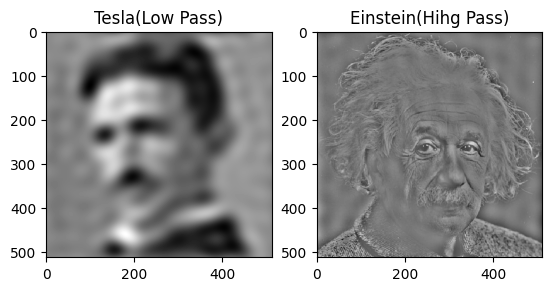

In [299]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title("Tesla(Low Pass)")
ax1.imshow(tesla_converted, cmap='gray')
ax2.set_title("Einstein(Hihg Pass)")
ax2.imshow(einstein_converted, cmap="gray")

In [300]:
# now we combine then before inversing the fft
tesla_einstein_fftshited = (tesla_lowpass + einstein_highpass)/2
tesla_einstein_fftshited.shape

(512, 512)

In [301]:
# rebuild the image again
tesla_einstein_ifftshift = np.fft.ifftshift(tesla_einstein_fftshited)
tesla_einstein_ifft = np.fft.ifft2(tesla_einstein_ifftshift)
tesla_einstein_real = np.real(tesla_einstein_ifft)
tesla_einstein_real.shape

(512, 512)

Text(0.5, 1.0, 'Hybrid Tesla Einstein')

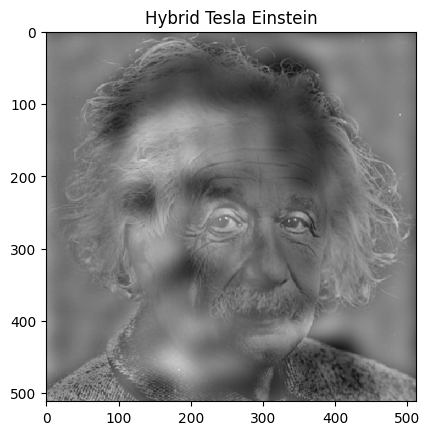

In [302]:
plt.imshow(tesla_einstein_real, cmap='gray')
plt.title("Hybrid Tesla Einstein")
